<a href="https://colab.research.google.com/github/marjorieariele/Projetos-IA/blob/main/Autos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout,BatchNormalization,Activation
from keras.optimizers import SGD
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, cross_val_score,KFold,RandomizedSearchCV
import matplotlib.font_manager
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
# Função para imprimir os gráficos de treinamento
def plotHistory(history, title):

  fig, ax = plt.subplots(1,2,figsize=(26,10))

  # Imprime a curva de aprendizado
  ax[0].set_title('Mean Absolute Percentage Error', pad=-40)
  ax[0].plot(history.history['loss'], label='train')
  ax[0].plot(history.history['val_loss'], label='valid')
  ax[0].legend(loc='best')

  # Imprime a curva de acurácia
  ax[1].set_title('Mean Absolute Error', pad=-40)
  ax[1].plot(history.history['mae'], label='train')
  ax[1].plot(history.history['val_mae'], label='valid')
  ax[1].legend(loc='best')

  fig.suptitle(title)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IA/Gustavo Classificacao/autos.csv', sep=',', header=0, encoding='cp1252')
#df = pd.read_csv('autos.csv.gz', sep=',', header=0, compression='gzip',encoding='cp1252')
df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
169250,2016-03-08 16:55:20,Smart_Fortwo_Pulse_Motor_Neuw_Facelift,privat,Angebot,1999,test,kleinwagen,2005,automatik,40,fortwo,50000,1,benzin,smart,nein,2016-03-08 00:00:00,0,4420,2016-03-17 19:58:51
6395,2016-03-09 19:06:18,Pontiac_Firebird,privat,Angebot,2500,test,coupe,1990,automatik,140,NaN,150000,9,benzin,sonstige_autos,nein,2016-03-09 00:00:00,0,35578,2016-03-15 08:15:11
232101,2016-03-13 10:06:22,Subaru_Brat_4x4,privat,Angebot,5000,test,andere,1987,manuell,74,andere,150000,0,NaN,subaru,nein,2016-03-13 00:00:00,0,56410,2016-04-05 18:45:02
203728,2016-04-01 17:48:44,renault_grand_scenic,privat,Angebot,3150,test,bus,2006,manuell,131,scenic,150000,9,diesel,renault,nein,2016-04-01 00:00:00,0,41334,2016-04-05 13:16:22
121023,2016-03-18 15:46:59,Opel_Combo_1_7_L_Diesel___Klima___El:Fen.___Se...,privat,Angebot,1350,control,kombi,2003,manuell,75,combo,150000,6,diesel,opel,nein,2016-03-18 00:00:00,0,26133,2016-03-18 15:46:59
214346,2016-03-11 12:37:15,Mercedes_Benz_350_CDI_CABRIO_AMG_PAKET_NAVI_CO...,privat,Angebot,32500,test,cabrio,2011,automatik,231,andere,90000,3,diesel,mercedes_benz,nein,2016-03-11 00:00:00,0,24568,2016-04-07 08:44:30
301732,2016-03-24 15:06:26,Opel_corsa_Swing_4_tuerig,privat,Angebot,200,control,kleinwagen,1994,manuell,0,corsa,150000,8,NaN,opel,NaN,2016-03-24 00:00:00,0,35708,2016-04-06 02:17:00
300990,2016-03-27 04:02:55,Ford_USA_Explorer_Sport_2/3_Tuerer_sehr_selten.,privat,Angebot,3650,test,suv,1998,automatik,207,andere,150000,1,benzin,ford,nein,2016-03-27 00:00:00,0,42657,2016-03-30 14:46:45
53858,2016-03-29 23:54:36,Renault_Clio_II_/_Bastler,privat,Angebot,275,control,kleinwagen,2000,manuell,55,clio,150000,0,benzin,renault,ja,2016-03-29 00:00:00,0,64395,2016-04-02 20:48:09
127865,2016-04-02 16:52:37,Schoener_C_Corsa_zu_verkaufen!,privat,Angebot,1750,control,kleinwagen,2001,manuell,58,corsa,150000,4,benzin,opel,nein,2016-04-02 00:00:00,0,66851,2016-04-02 16:52:37


In [ ]:
df.shape

(371528, 20)

In [ ]:
#Removendo a coluna dateCrawled (Data que o registro foi extraído do web site,
#sem importância para a previsão dos pesos)
df = df.drop(['dateCrawled'], axis=1)
df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
df.shape

(371528, 19)

In [ ]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [ ]:
# Analisando estatísticas do nosso Dataset
df.describe(include='all')

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


In [ ]:
df.shape

(371528, 19)

In [ ]:
#Removendo as colunas:
df= df.drop(['name','seller','offerType','lastSeen','nrOfPictures','vehicleType','postalCode','dateCreated','brand'], axis=1)
df.head()

,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,notRepairedDamage
0,480,test,1993,manuell,0,golf,150000,0,benzin,NaN
1,18300,test,2011,manuell,190,NaN,125000,5,diesel,ja
2,9800,test,2004,automatik,163,grand,125000,8,diesel,NaN
3,1500,test,2001,manuell,75,golf,150000,6,benzin,nein
4,3600,test,2008,manuell,69,fabia,90000,7,diesel,nein


In [ ]:
df.shape

(371528, 10)

In [ ]:
#verificando os tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   price                371528 non-null  int64 
 1   abtest               371528 non-null  object
 2   yearOfRegistration   371528 non-null  int64 
 3   gearbox              351319 non-null  object
 4   powerPS              371528 non-null  int64 
 5   model                351044 non-null  object
 6   kilometer            371528 non-null  int64 
 7   monthOfRegistration  371528 non-null  int64 
 8   fuelType             338142 non-null  object
 9   notRepairedDamage    299468 non-null  object
dtypes: int64(5), object(5)
memory usage: 28.3+ MB


In [ ]:
# Analisando o Dataset após remover colunas irrelevantes
df.describe(include='all')

,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,notRepairedDamage
count,3.715280e+05,371528,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,299468
unique,NaN,2,NaN,2,NaN,251,NaN,NaN,7,2
top,NaN,test,NaN,manuell,NaN,golf,NaN,NaN,benzin,nein
freq,NaN,192585,NaN,274214,NaN,30070,NaN,NaN,223857,263182
mean,1.729514e+04,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN
std,3.587954e+06,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN
min,0.000000e+00,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN
25%,1.150000e+03,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN
50%,2.950000e+03,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN
75%,7.200000e+03,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN


In [ ]:
#há dados duplicados ?
print("Contagem antes de remover dados duplicados: ")
df.count()

Contagem antes de remover dados duplicados: 


price                  371528
abtest                 371528
yearOfRegistration     371528
gearbox                351319
powerPS                371528
model                  351044
kilometer              371528
monthOfRegistration    371528
fuelType               338142
notRepairedDamage      299468
dtype: int64

In [ ]:
#quantos sao
df.duplicated().sum()

20264

In [ ]:
#removendo dados duplicados
df = df.drop_duplicates()
print("Contagem após remover dados duplicados: ")
df.count()

Contagem após remover dados duplicados: 


price                  351264
abtest                 351264
yearOfRegistration     351264
gearbox                333232
powerPS                351264
model                  332077
kilometer              351264
monthOfRegistration    351264
fuelType               319549
notRepairedDamage      282942
dtype: int64

In [ ]:
# ainda tenho duplicadas?
df.duplicated().sum()

0

In [ ]:
# Dados faltantes em porcentagem
((df.isna().sum()/df.shape[0]).sort_values(ascending=False)) *100

notRepairedDamage      19.450328
fuelType                9.028822
model                   5.462273
gearbox                 5.133461
price                   0.000000
abtest                  0.000000
yearOfRegistration      0.000000
powerPS                 0.000000
kilometer               0.000000
monthOfRegistration     0.000000
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351264 entries, 0 to 371527
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   price                351264 non-null  int64 
 1   abtest               351264 non-null  object
 2   yearOfRegistration   351264 non-null  int64 
 3   gearbox              333232 non-null  object
 4   powerPS              351264 non-null  int64 
 5   model                332077 non-null  object
 6   kilometer            351264 non-null  int64 
 7   monthOfRegistration  351264 non-null  int64 
 8   fuelType             319549 non-null  object
 9   notRepairedDamage    282942 non-null  object
dtypes: int64(5), object(5)
memory usage: 29.5+ MB


In [ ]:
#verificando dados categoricos
print(df.abtest.value_counts())
print(df.gearbox.value_counts())
print(df.model.value_counts())
print(df.fuelType.value_counts())
print(df.notRepairedDamage.value_counts())

test       181792
control    169472
Name: abtest, dtype: int64
manuell      260134
automatik     73098
Name: gearbox, dtype: int64
golf               27880
andere             25495
3er                19326
polo               12339
corsa              11846
                   ...  
serie_2                8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 251, dtype: int64
benzin     212593
diesel     100684
lpg          5144
cng           547
hybrid        272
andere        206
elektro       103
Name: fuelType, dtype: int64
nein    247765
ja       35177
Name: notRepairedDamage, dtype: int64


In [ ]:
#decodificando a coluna abtest
df.replace({'abtest':{'test':0,'control':1}},inplace=True)
#decodificando a coluna gearbox
df.replace({'gearbox':{'manuell':0,'automatik':1}},inplace=True)
#decodificando a coluna fuelType
df.replace({'fuelType':{'benzin':0,'diesel':1,'lpg':2,'cng':3,'hybrid':4,'andere':5,'elektro':6}},inplace=True)
#decodificando a coluna notRepairedDamage
df.replace({'notRepairedDamage':{'nein':0,'ja':1}},inplace=True)

In [ ]:
df.info

<bound method DataFrame.info of         price  abtest  yearOfRegistration  gearbox  powerPS        model  \
0         480       0                1993      0.0        0         golf   
1       18300       0                2011      0.0      190          NaN   
2        9800       0                2004      1.0      163        grand   
3        1500       0                2001      0.0       75         golf   
4        3600       0                2008      0.0       69        fabia   
...       ...     ...                 ...      ...      ...          ...   
371523   2200       0                2005      NaN        0          NaN   
371524   1199       0                2000      1.0      101       fortwo   
371525   9200       0                1996      0.0      102  transporter   
371526   3400       0                2002      0.0      100         golf   
371527  28990       1                2013      0.0      320      m_reihe   

        kilometer  monthOfRegistration  fuelType  notRe

In [ ]:
#valores ausentes ou nulos
print(df.isnull().sum())

price                      0
abtest                     0
yearOfRegistration         0
gearbox                18032
powerPS                    0
model                  19187
kilometer                  0
monthOfRegistration        0
fuelType               31715
notRepairedDamage      68322
dtype: int64


In [ ]:
df.columns

Index(['price', 'abtest', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'notRepairedDamage'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['gearbox', 'model', 'fuelType', 'notRepairedDamage']
imputer = SimpleImputer(strategy='most_frequent')

for column in columns_to_impute:
    # Perform imputation for each column
    df[column] = imputer.fit_transform(df[[column]])


In [ ]:
df.head()

,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,notRepairedDamage
0,480,0,1993,0.0,0,golf,150000,0,0.0,0.0
1,18300,0,2011,0.0,190,golf,125000,5,1.0,1.0
2,9800,0,2004,1.0,163,grand,125000,8,1.0,0.0
3,1500,0,2001,0.0,75,golf,150000,6,0.0,0.0
4,3600,0,2008,0.0,69,fabia,90000,7,1.0,0.0


In [ ]:
# Apagando as linhas com dados faltantes
#df = df.dropna(subset=["gearbox", "model",'fuelType','notRepairedDamage'])
#df.head(30)

In [ ]:
# valores ausentes ou nulos
print(df.isnull().sum())

price                  0
abtest                 0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
notRepairedDamage      0
dtype: int64


In [ ]:
df.head()


,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,notRepairedDamage
0,480,0,1993,0.0,0,golf,150000,0,0.0,0.0
1,18300,0,2011,0.0,190,golf,125000,5,1.0,1.0
2,9800,0,2004,1.0,163,grand,125000,8,1.0,0.0
3,1500,0,2001,0.0,75,golf,150000,6,0.0,0.0
4,3600,0,2008,0.0,69,fabia,90000,7,1.0,0.0


In [ ]:
df.shape

(351264, 10)

In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

,price,abtest,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,notRepairedDamage,model_145,...,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira
0,480,0,1993,0.0,0,150000,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,18300,0,2011,0.0,190,125000,5,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,9800,0,2004,1.0,163,125000,8,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1500,0,2001,0.0,75,150000,6,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,3600,0,2008,0.0,69,90000,7,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Separando os previsores das classes
prev = df.drop(columns=["price"]).values
classe = df["price"].values

In [ ]:
display (prev)

array([[0.000e+00, 1.993e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 2.011e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 2.004e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.996e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 2.002e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.013e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
display(classe)

array([  480, 18300,  9800, ...,  9200,  3400, 28990])

In [ ]:
#labelencoder_classe = LabelEncoder()
#classe = labelencoder_classe.fit_transform(classe) #price
#Normalização de Atributos
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_X = MinMaxScaler()
classe = scaler_X.fit_transform(prev)

In [ ]:
display(classe)

array([[0.        , 0.11034559, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11234582, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11156795, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.11067896, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11134571, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.11256806, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
#Normalização
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_X = MinMaxScaler()
prev = scaler_X.fit_transform(prev)

In [ ]:
display(prev)

array([[0.        , 0.11034559, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11234582, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11156795, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.11067896, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11134571, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.11256806, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
len(prev)

351264

In [ ]:
len(classe)

351264

In [ ]:
df.shape

(351264, 259)

In [ ]:
#Separação da base de dados
from sklearn.model_selection import train_test_split
#Base de treino e teste+valid
train_x, test_valid_x, train_y, test_valid_y = train_test_split(prev, classe, test_size=0.1, random_state=0, stratify=prev[:, 0])
#Base de teste e validação
test_x, valid_x, test_y, valid_y = train_test_split(test_valid_x, test_valid_y, test_size=0.5, random_state=0, stratify=test_valid_x[:, 0])

In [ ]:
len(train_x)

316137

In [ ]:
len(train_y)

316137

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
classificador = tf.keras.models.Sequential()
classificador = Sequential()

In [ ]:
train_x.shape

(316137, 258)

In [ ]:
valid_y.shape

(17564, 258)

In [ ]:
#from keras.layers import Dense,Dropout
#from keras.optimizers import SGD

#Treinamento = classificador.fit(train_x, train_y,validation_data=(valid_x, valid_y),epochs=200, batch_size=700)
#classificador.add(Dense(1, activation='relu'))

In [ ]:
#opt = SGD(learning_rate=0.001, momentum=0.9)
#classificador.compile(loss='mape', optimizer='adam', metrics=['mae'])

In [ ]:
#from keras.src.layers.serialization import activation
#classificador = Sequential ()
#classificador.add(Dense(32,activation='relu', kernel_initializer='he_uniform',input_dim =prev.shape[1]))
#classificador.add(Dense(units =64,activation='relu'))
#classificador.add(Dense(1, activation = 'sigmoid'))
#classificador.compile(loss='mape', optimizer='adam', metrics=['mae'])

In [ ]:
model_first = Sequential()
model_first.add(Dense(20, activation='relu', kernel_initializer='he_uniform',input_dim = len(test_x[0])))
model_first.add(Dense(1, activation='relu'))

In [ ]:
#opt = SGD(learning_rate=0.001, momentum=0.9)
model_first.compile(loss='mape', optimizer='adam', metrics=['mae'])

In [ ]:
history_tiny = model_first.fit(train_x, train_y,
                    validation_data=(valid_x, valid_y),
                    epochs=100, verbose=1, batch_size=train_x.shape[0])

Epoch 1/100
1/1 [==============================] - 11s 11s/step - loss: 27657456.0000 - mae: 0.0399 - val_loss: 22028328.0000 - val_mae: 0.0343
Epoch 2/100
1/1 [==============================] - 1s 749ms/step - loss: 21997398.0000 - mae: 0.0343 - val_loss: 17288720.0000 - val_mae: 0.0297
Epoch 3/100
1/1 [==============================] - 1s 750ms/step - loss: 17261386.0000 - mae: 0.0297 - val_loss: 13420567.0000 - val_mae: 0.0258
Epoch 4/100
1/1 [==============================] - 1s 643ms/step - loss: 13395856.0000 - mae: 0.0259 - val_loss: 10263662.0000 - val_mae: 0.0227
Epoch 5/100
1/1 [==============================] - 1s 676ms/step - loss: 10247830.0000 - mae: 0.0228 - val_loss: 7747265.5000 - val_mae: 0.0203
Epoch 6/100
1/1 [==============================] - 1s 795ms/step - loss: 7720541.5000 - mae: 0.0203 - val_loss: 5727118.0000 - val_mae: 0.0183
Epoch 7/100
1/1 [==============================] - 1s 570ms/step - loss: 5705351.0000 - mae: 0.0183 - val_loss: 4136388.2500 - val_mae

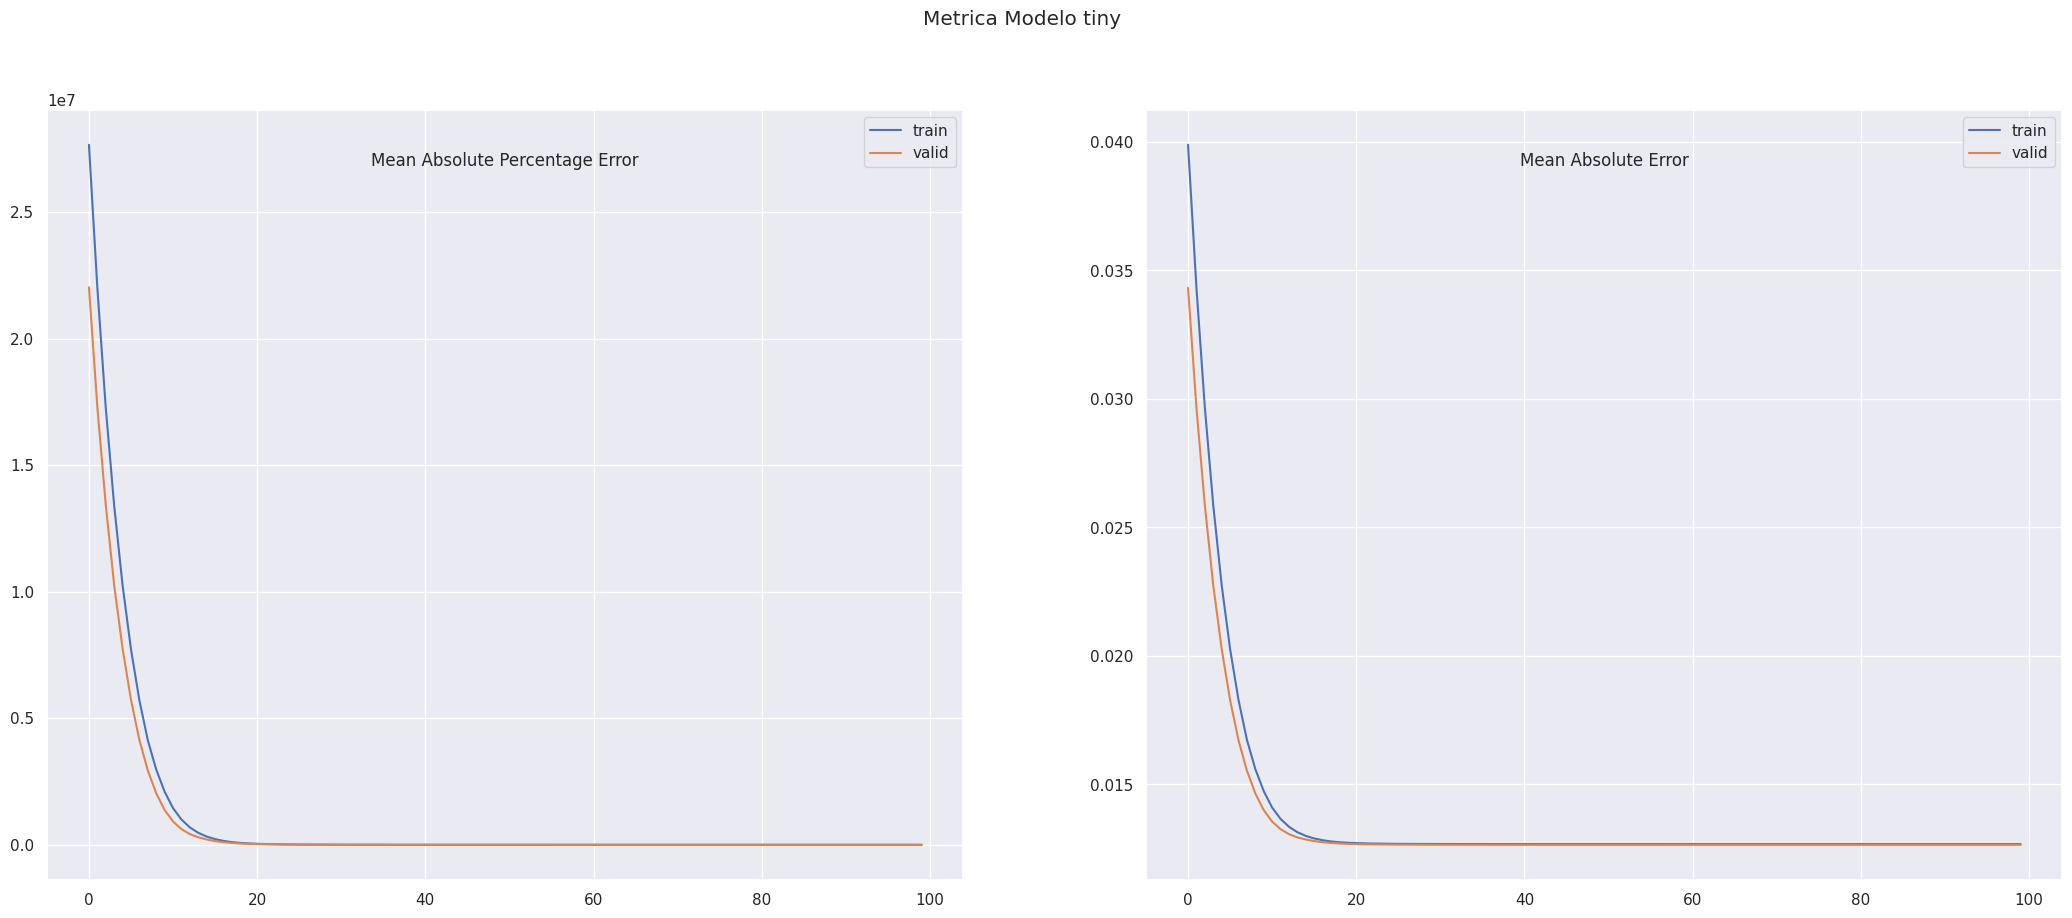

In [ ]:
title_tiny = 'Metrica Modelo tiny'
plotHistory(history_tiny,title_tiny)

In [ ]:
pesos0 = model_first.layers[0].get_weights()
print(pesos0)
print(len(pesos0))
pesos1 = model_first.layers[1].get_weights

[array([[-0.09045279, -0.02908068,  0.07940459, ..., -0.14834931,
         0.04844048,  0.07115655],
       [-0.11493643,  0.11358415,  0.06349738, ..., -0.02578995,
        -0.02415906,  0.10468709],
       [-0.10758237,  0.03454367,  0.14462383, ...,  0.09620464,
         0.15744148, -0.03212407],
       ...,
       [ 0.11451057,  0.05623522,  0.16151355, ...,  0.11006529,
         0.08336994, -0.04230979],
       [ 0.02563354, -0.00728588,  0.02762645, ..., -0.08785106,
        -0.14718994,  0.06603906],
       [-0.03475374, -0.10703188,  0.06913725, ...,  0.03875331,
        -0.0095749 , -0.11859694]], dtype=float32), array([ 0.01935936, -0.01706301,  0.01785265, -0.01649437, -0.01648383,
        0.02268068,  0.01913159,  0.01963391, -0.01567569,  0.01707077,
        0.02165062,  0.01952491,  0.01757027,  0.00914432,  0.0164222 ,
        0.01757927, -0.01746252, -0.01810802,  0.01925557,  0.01796133],
      dtype=float32)]
2


In [ ]:
classificador_json = model_first.to_json()
with open('classificador_breast.json', 'w') as json_file:
    json_file.write(classificador_json)

# Em seguida, estamos salvando os pesos do modelo em um arquivo chamado 'classificador_breast.h5'.
model_first.save_weights('classificador_breast.h5')